In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import string

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
import nltk

import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Packages for checking assumptions
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from matplotlib import rcParams

rcParams['figure.figsize'] = 11,11


In [2]:
path = './'
filename = 'heart.csv'

try:
    data_heart = pd.read_csv(path+filename)
    print("File Loaded Succesfully ")
except:
    print("File Not Found !!")

File Loaded Succesfully 


In [3]:
data_heart.shape

(303, 14)

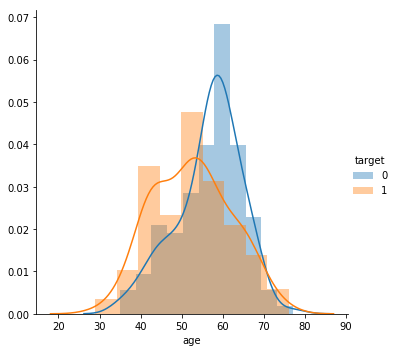

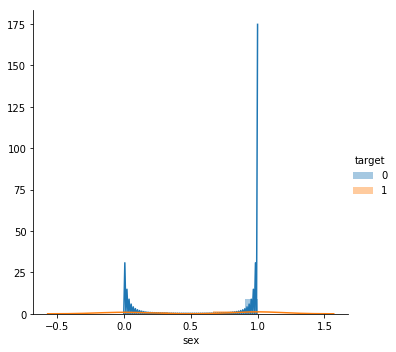

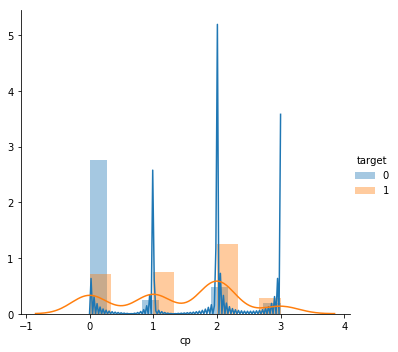

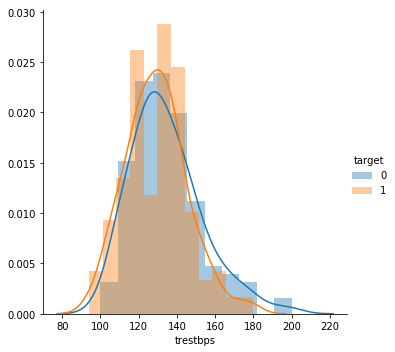

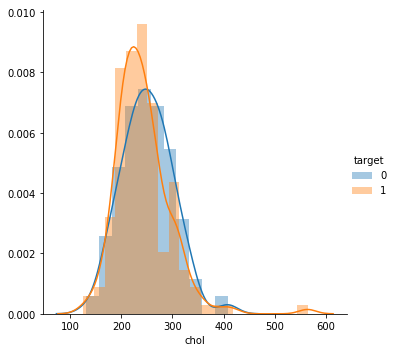

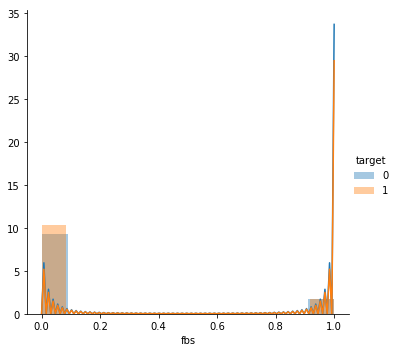

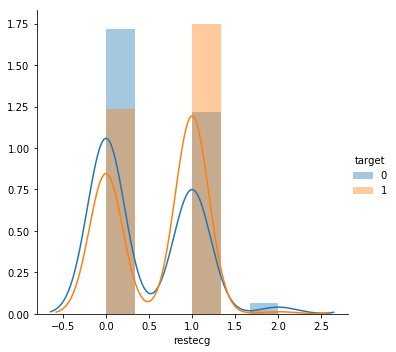

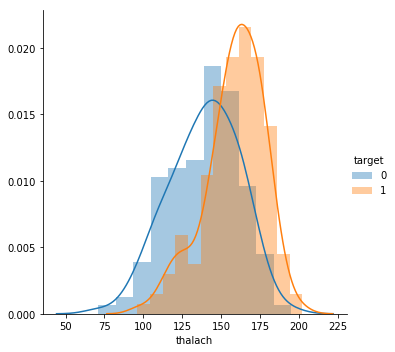

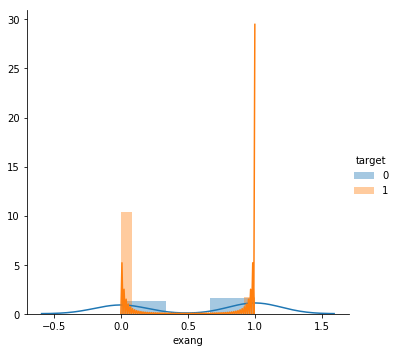

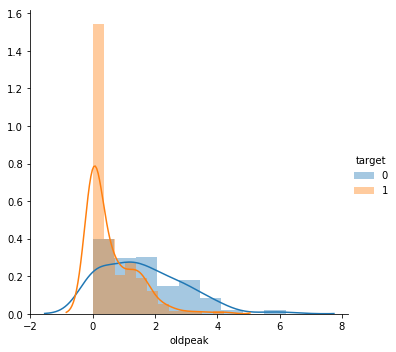

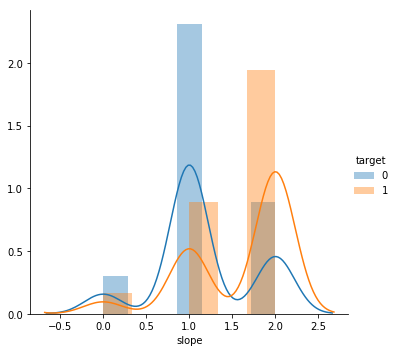

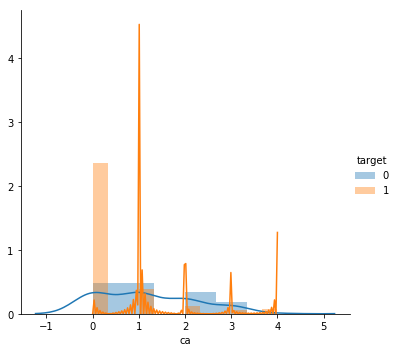

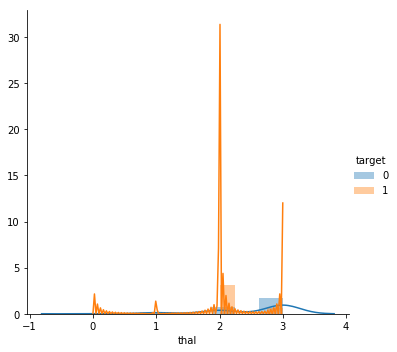

In [6]:
for indvar in data_heart.columns.values:
    if indvar == 'target':
        continue
    sns.FacetGrid(data_heart, hue="target", height =5) \
       .map(sns.distplot, indvar) \
       .add_legend();
    plt.show();

C:\Users\Hidik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Hidik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


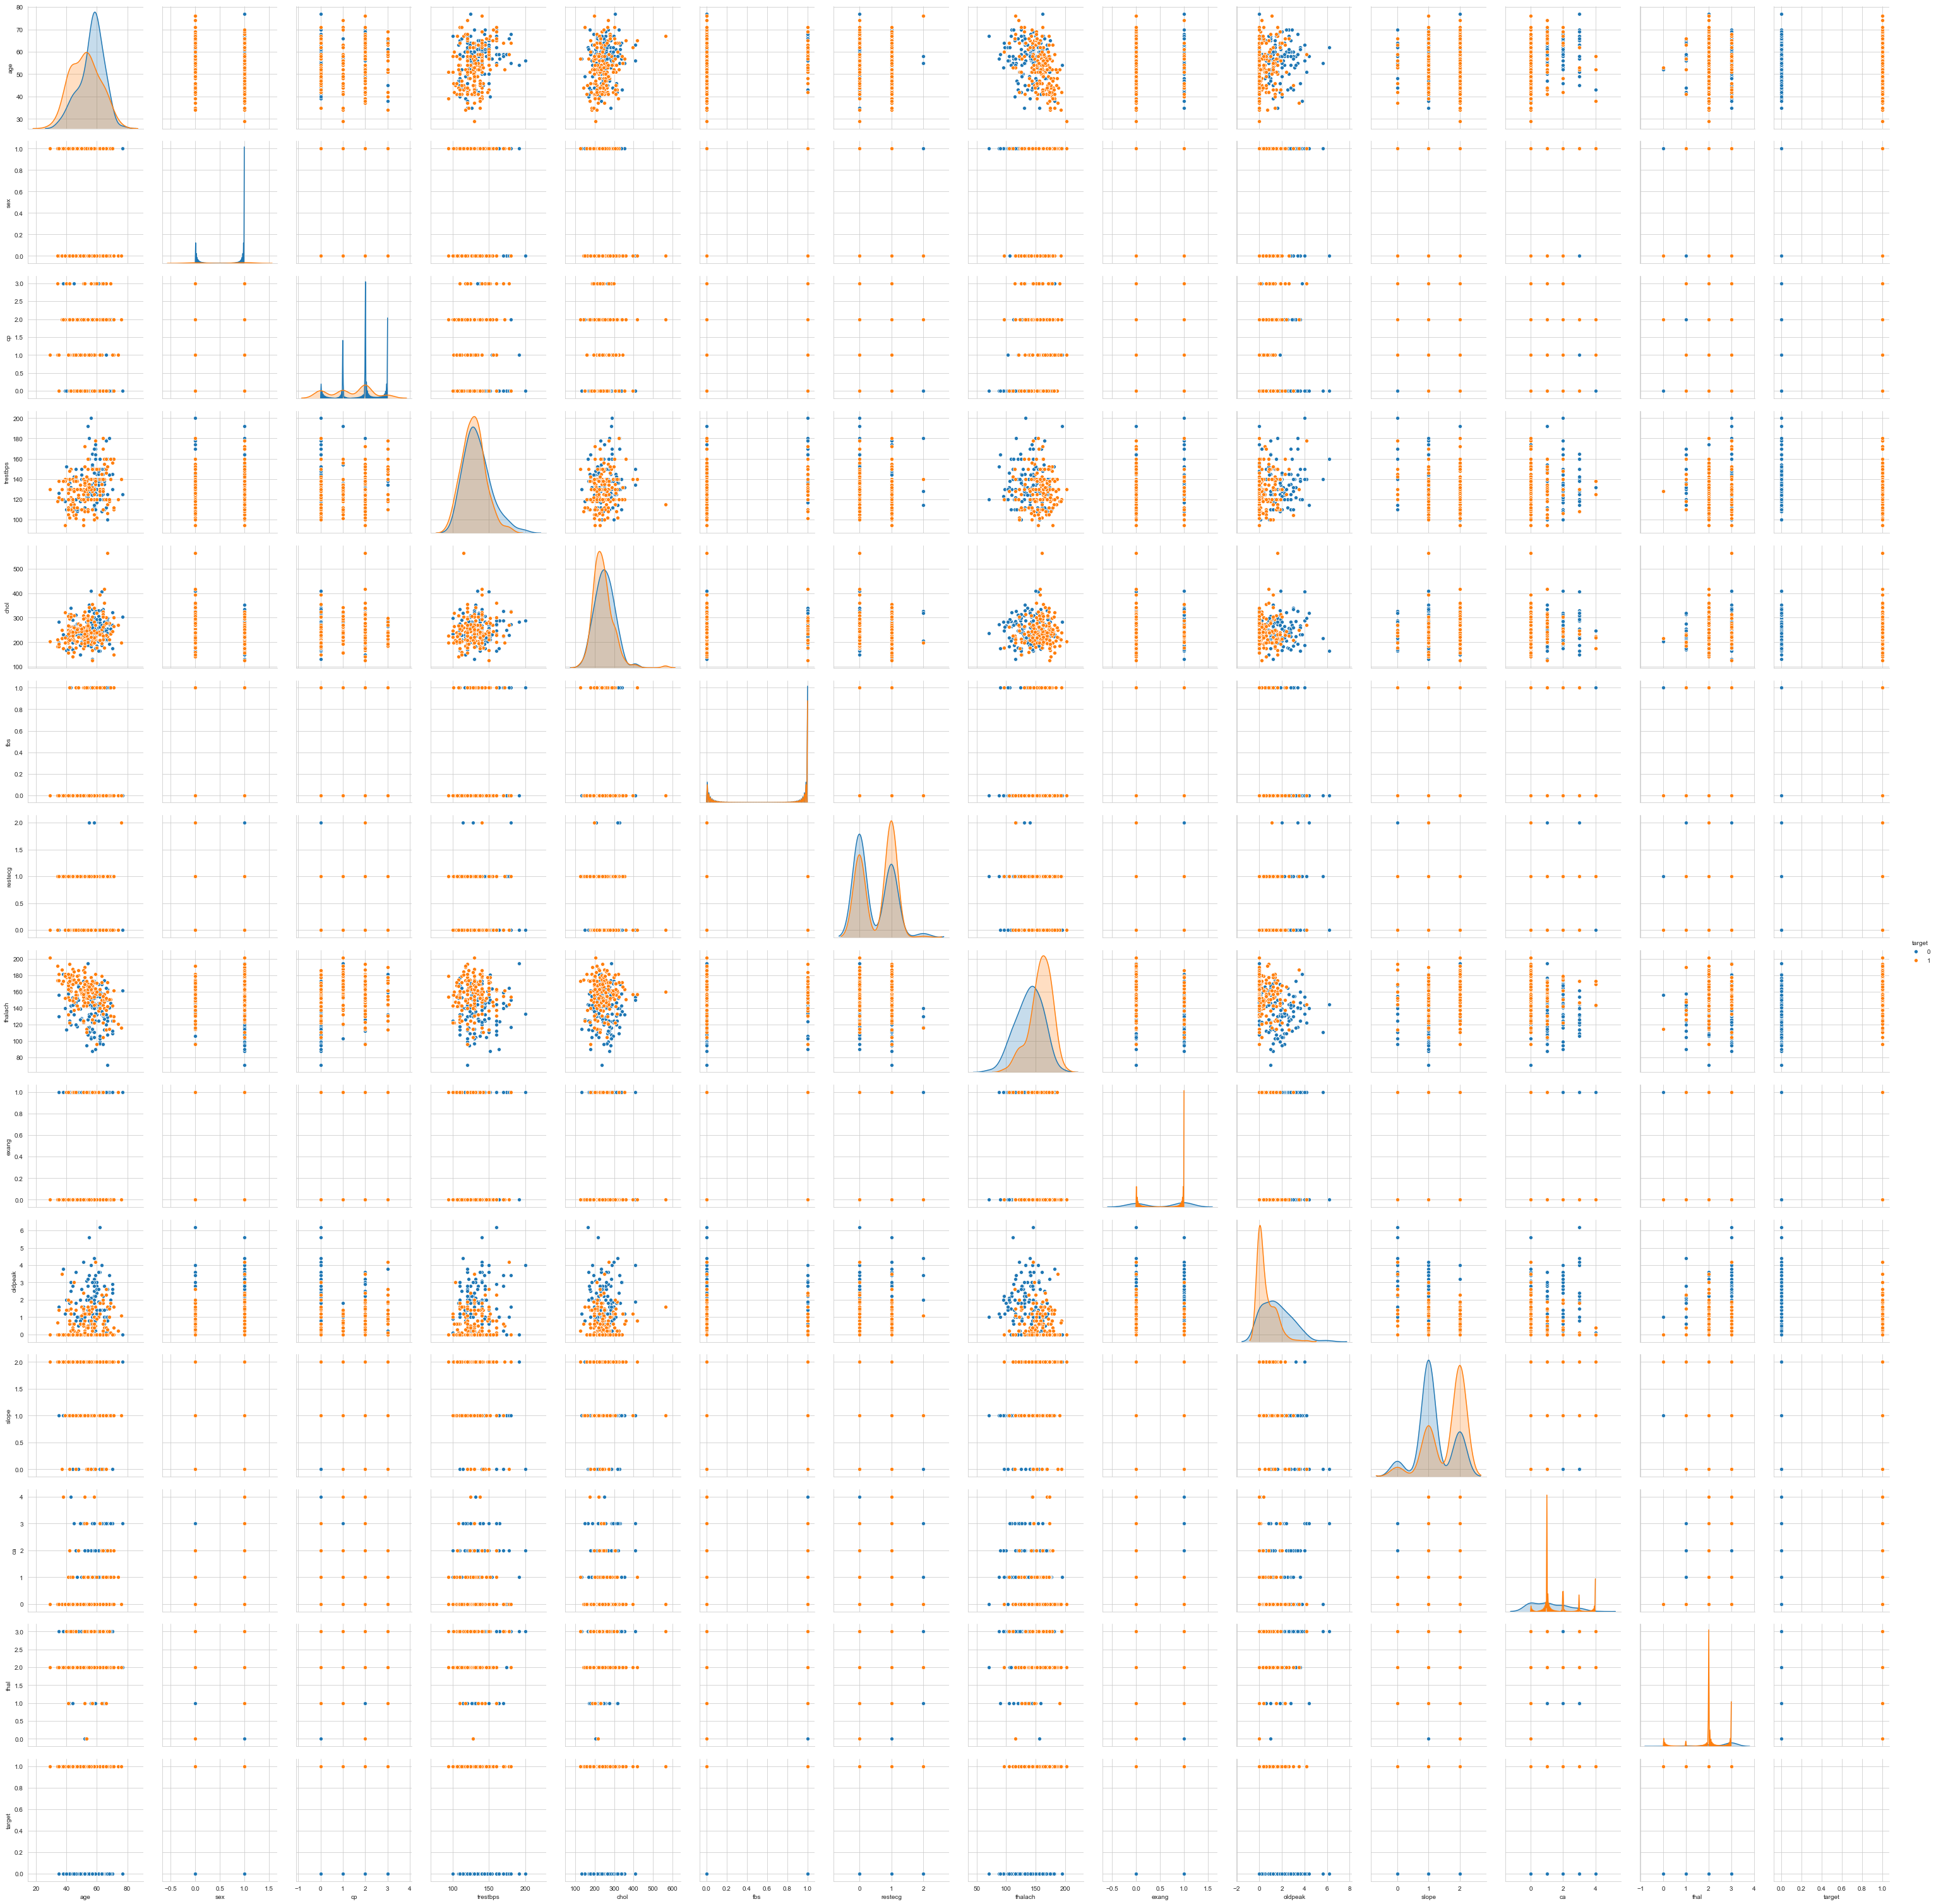

In [7]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data_heart, hue="target", height = 3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.